{-23.29731171717186: 0.43400000000000033, -22.927810553704294: 0.2940000000000002, -22.92366633668468: 0.2720000000000002}


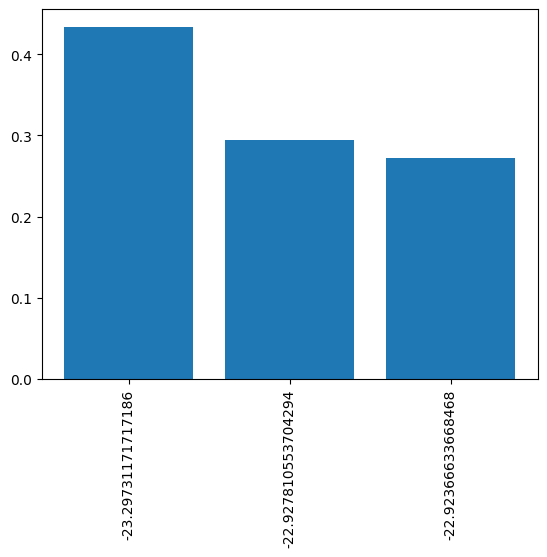

In [5]:
from QCBM import real_dist,Ansatz,Ansatz1
import matplotlib.pyplot as plt 
import numpy as np
from dataset_seed import sample_seed_dataset,origin_dist


filename = './data/dataset.txt'
data_seed = sample_seed_dataset(filename)
Q = origin_dist(data_seed[350:850])
print(Q)
plt.bar(range(len(Q)),Q.values()) 
plt.xticks(range(len(Q)),Q.keys(),rotation=90)
plt.show()

In [2]:
from mindquantum.simulator import Simulator
from mindquantum.core import Measure
p = 7
num_spins = 15 
shots = 5000
circ = Ansatz(num_spins,p)
sim = Simulator('mqvector',circ.n_qubits)
params = np.load('params_p_7_ansatz_2.npy')
params_dict = dict(zip(circ.params_name,params))
for i in range(num_spins):
        circ += Measure(f'q{i}').on(i)
sim.reset()
res = sim.sampling(circ,shots=shots,pr=params_dict).data
generator_res = [0. for _ in range(2**num_spins)]
for bin2 in res.keys():
    num_two_to_ten = int(bin2,2)
    generator_res[num_two_to_ten] = res[bin2] / shots

# for key in list(res.keys()):
#     if res[key] < 3:
#         del res[key]
print(len(res.values()))

12


In [3]:
from dataset_seed import bin_to_config, ConfigToEnergy
# 将其转换成能量
J_dict = {'J': [[2, 10], [3, 7], [1, 2], [0, 12], [5, 11], [2, 12], [5], [10, 13], [0, 7], [8, 13], [2, 7], [10, 12], [3, 5], [2, 11], [4, 8], [2, 5], [11], [5, 6], [0, 13], [1, 14], [7, 10], [7, 11], [0, 14], [12, 14], [1, 9], [2, 4], [3], [9, 13], [11, 13], [0, 6], [0, 9], [0, 2], [5, 13], [11, 12], [3, 13], [2, 13], [8, 9], [6, 7], [10, 14], [9, 11], [14], [3, 12], [11, 14], [6, 14], [1, 11], [1, 10], [1, 4], [4, 6], [8, 11], [3, 14], [13, 14], [1, 6], [2, 6], [6, 12], [4, 9], [6, 9], [5, 12], [4, 14], [3, 6], [4, 11]], 'c': [-0.3089648123797874, -0.7576845754953664, 0.5949810208278642, 1.1591380973967484, -0.5246813851651372, 0.45536011985841257, 0.41633207223405794, 0.7353067010232625, -0.7547738520816101, -1.564931072243712, -1.0669885527495762, 0.005401144448946017, -1.247891240818982, -1.4029611631077668, -0.6132061647104331, 1.6348497475992276, 1.0730882673170585, -0.929542941961458, 0.7155522680686297, 0.2712508898889926, -2.0566509568018017, 0.678639977051029, -0.841133741427456, -0.6527519814033634, 1.289988759704946, 0.569198799291439, 0.7390109371157891, -0.2664928142238923, -0.0972319870450568, -0.43172918148594824, -0.26253431456062337, 0.5799145149425491, 1.0208060905470735, 1.0655534295557, -1.0999241623351292, -0.5525273930860122, -0.47648777867129755, 1.109670271902175, 0.23438346351412875, -0.1876081528418182, 1.144685306209543, -0.0023192592556606816, -0.1533462301967881, 0.7144905156647418, 0.4496030808668665, -0.5833976661174617, 0.3681169525195924, 1.0992856851521513, 0.12549899347216173, 0.31544338642895003, -0.36331569388166873, -1.5682631922523194, -0.16475956773166833, 1.4591801191532325, -0.7157374287114889, -0.8268855683859068, -0.7627125642679121, -1.532033970116369, 0.23043154425605888, -1.0429550070491544]}
gen_dict = {} 
for x in res.keys():
    conf = bin_to_config(x)
    energy = ConfigToEnergy(J_dict,conf)
    gen_dict[energy] = res[x] / shots
print(gen_dict)

{-5.455538989403262: 0.0002, -10.442121112369845: 0.0002, -6.036846719497623: 0.0002, -22.927810553704262: 0.0154, -21.313556965548685: 0.1586, -23.53985423748682: 0.0226, -15.449102228601056: 0.056, -23.29731171717183: 0.6036, -10.489417827322065: 0.0868, -16.311316097633025: 0.004, -22.92366633668465: 0.0446, -13.913541410111783: 0.0078}


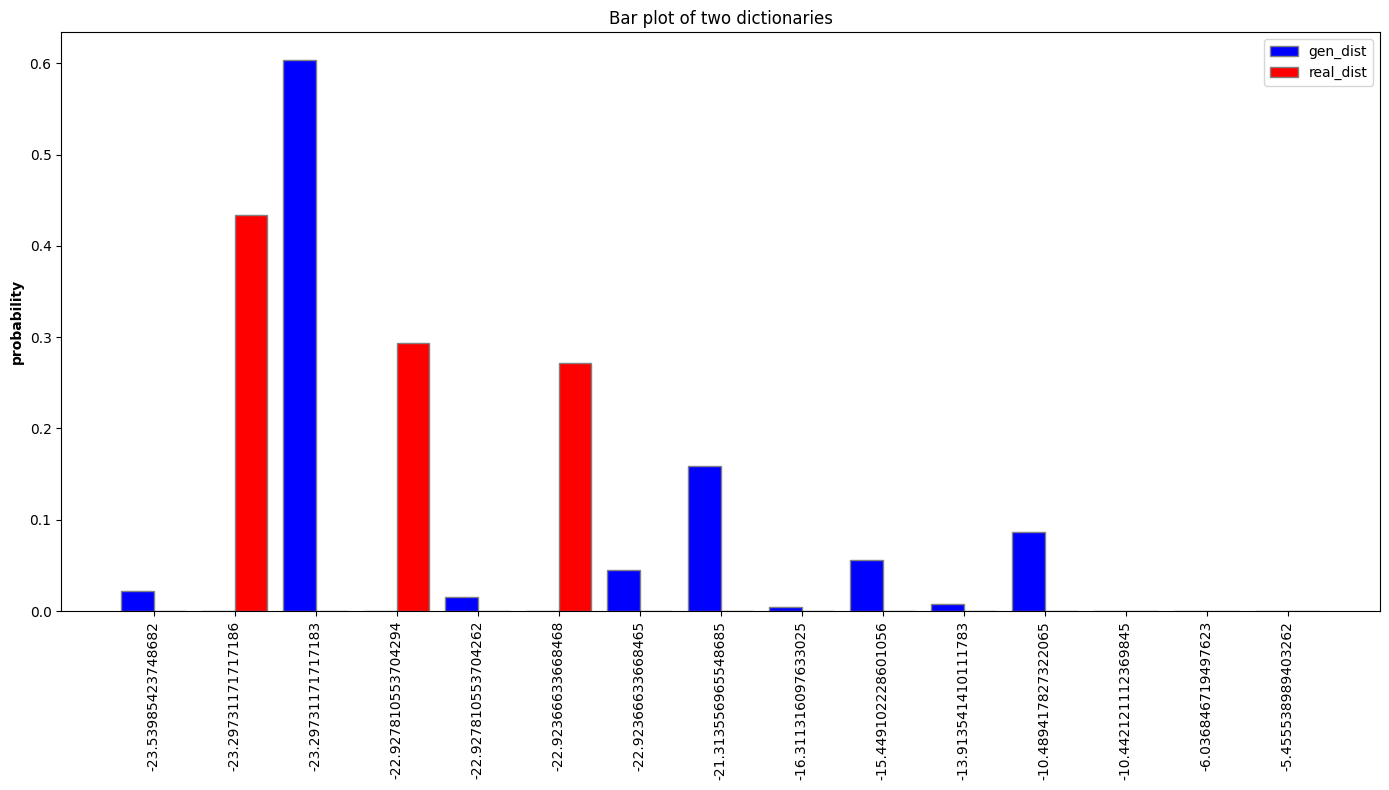

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 定义两个字典
dict1 = gen_dict
dict2 = Q

# 将字典中的键值对分离
keys1, values1 = zip(*dict1.items())
keys2, values2 = zip(*dict2.items())

# 生成两个字典的所有键的并集
all_keys = sorted(set(keys1).union(set(keys2)))

# 创建一个辅助函数来获取字典中每个键的值，如果键不存在则返回0
def get_value(d, key):
    return d.get(key, 0)

# 为所有键生成相应的值列表
values1 = [get_value(dict1, key) for key in all_keys]
values2 = [get_value(dict2, key) for key in all_keys]

# 设置柱状图的宽度
bar_width = 0.4

# 设置每组柱状图的x轴位置
r1 = np.arange(len(all_keys))
r2 = [x + bar_width for x in r1]

# 创建柱状图
plt.figure(figsize=(14, 8))
plt.bar(r1, values1, color='b', width=bar_width, edgecolor='grey', label='gen_dist')
plt.bar(r2, values2, color='r', width=bar_width, edgecolor='grey', label='real_dist')

# 添加标签和标题
# plt.xlabel(fontweight='bold')
plt.ylabel('probability',fontweight='bold')
plt.title('Bar plot of two dictionaries')

# 添加x轴刻度
plt.xticks([r + bar_width/2 for r in range(len(all_keys))], all_keys, rotation=90)

# 添加图例
plt.legend()

# 显示图形
plt.tight_layout()
plt.savefig('result.png',dpi=200)
plt.show()